In [8]:
import sklearn.datasets
import itertools
import numpy as np
import pdb
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from copy import deepcopy
from sklearn.utils import shuffle
from random import randint

NMAX = 999999999

In [9]:

def get_data():
    dataset = sklearn.datasets.load_diabetes()
    _dataset_X = dataset['data']
    _dataset_y = dataset['target']
    X = np.array(_dataset_X)
    y = np.array(_dataset_y)
    X = np.insert(X, 0, 1, axis=1)
    return [X, y]

def split_train_test(X, y):
    datasize = X.shape[0]
    X, y= shuffle(X, y, random_state = randint(0, 100))
    train_X = X[:int(datasize*80/100)]
    train_y = y[:int(datasize*80/100)]
    test_X = X[int(datasize*80/100):]
    test_y = y[int(datasize*80/100):]
    return [train_X, train_y, test_X, test_y]


In [10]:

def get_beta (X, y):
    beta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)), X.T), y)
    return beta
    
def get_rss (X, y, beta):
    loss = np.dot((np.dot(X,beta)-y).T,np.dot(X,beta)-y)
    return loss

In [11]:
def findsubsets(S,m):
    return list(itertools.combinations(S, m))

def best_subset (X, y, test_X, test_y):
    no_features = X.shape[1]
    all_indices = [x for x in range(1,no_features)]
    p1 = []
    p2 = []
    
    for i in range (1,no_features):
        best_rss = NMAX
        best_beta = []
        best_subset = []
        
        for new_subset in findsubsets(all_indices,i):
            new_subset += (0,)
            new_X = X[:,new_subset]
            new_beta = get_beta(new_X,y)
            new_rss = get_rss(new_X,y,new_beta)
            
            if best_rss > new_rss:
                best_rss = new_rss
                best_beta = new_beta
                best_subset = new_subset
        
        p1.append(best_rss/X.shape[0])
        p2.append(get_rss(test_X[:,best_subset],test_y,best_beta)/test_X.shape[0])
    
    return [p1, p2]
   

In [18]:
def greedy_subset (X, y, test_X, test_y):
    no_features = X.shape[1]
    subset = [0]
    p1 = []
    p2 = []

    for i in range (1,no_features):
        best_rss = NMAX
        best_beta = []
        best_subset = []
        
        for x in range (1,no_features):
            if x not in subset:
                new_subset = subset+[x]
                new_X = X[:, new_subset]
                
                new_beta = get_beta(new_X,y)
                new_rss = get_rss(new_X,y,new_beta)
                
                if best_rss > new_rss:
                    best_rss = new_rss
                    best_beta = new_beta
                    best_subset = new_subset
        
        subset = best_subset
        p1.append(best_rss/X.shape[0])
        p2.append(get_rss(test_X[:,best_subset],test_y,best_beta)/test_X.shape[0])

    return [p1, p2]

In [19]:
def run():
    dataset_X, dataset_y = get_data()
    no_runs = 10 
    p1_avg = np.array([])
    p2_avg = np.array([])
    
    for i in range(0,no_runs):
        train_X, train_y, test_X, test_y = split_train_test(dataset_X,dataset_y)
        p1, p2 = best_subset(train_X, train_y, test_X, test_y)
        p3, p4 = greedy_subset(train_X, train_y, test_X, test_y)
        
        if i==0:
            p1_avg = np.array(p1)/no_runs
            p2_avg = np.array(p2)/no_runs
            p3_avg = np.array(p3)/no_runs
            p4_avg = np.array(p4)/no_runs
        p1_avg += np.array(p1)/no_runs
        p2_avg += np.array(p2)/no_runs
        p3_avg += np.array(p3)/no_runs
        p4_avg += np.array(p4)/no_runs
  
    plt.title("Best & Greedy Subset")
    plt.xlabel("no_features")
    plt.ylabel("MSE")
    plt.legend(handles=[mpatches.Patch(color='red', label='best'), mpatches.Patch(color='blue', label='greedy')])
    plt.plot([x for x in range(1,len(p1)+1)], p1_avg, marker='o', color='red', linestyle='-')
    plt.plot([x for x in range(1,len(p3)+1)], p3_avg, marker='o', color='blue', linestyle='-')
    plt.show()
    
    plt.title("Best Subset")
    plt.xlabel("no_features")
    plt.ylabel("MSE")
    plt.legend(handles=[mpatches.Patch(color='red', label='train'), mpatches.Patch(color='blue', label='test')])
    plt.plot([x for x in range(1,len(p1)+1)], p1_avg, marker='o', color='red', linestyle='-')
    plt.plot([x for x in range(1,len(p2)+1)], p2_avg, marker='o', color='blue', linestyle=':')
    plt.show()
    
    plt.title("Greedy Subset")
    plt.xlabel("no_features")
    plt.ylabel("MSE")
    plt.legend(handles=[mpatches.Patch(color='red', label='train'), mpatches.Patch(color='blue', label='test')])
    plt.plot([x for x in range(1,len(p3)+1)], p3_avg, marker='o', color='red', linestyle='-')
    plt.plot([x for x in range(1,len(p4)+1)], p4_avg, marker='o', color='blue', linestyle=':')
    plt.show()


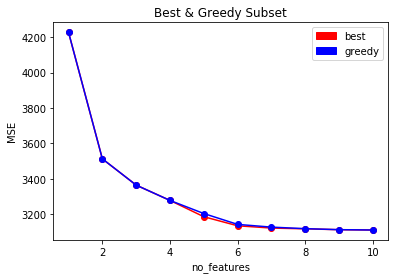

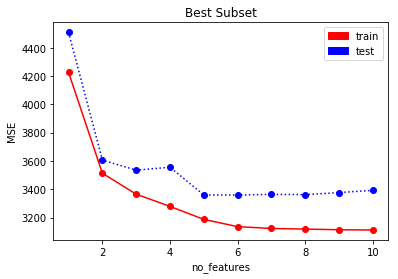

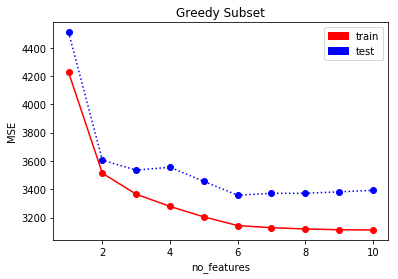

In [23]:
# dataset_X, dataset_y = get_data()
# train_X, train_y, test_X, test_y = split_train_test(dataset_X,dataset_y)
# _, _ = best_subset(train_X, train_y, test_X, test_y)
# _, _ = greedy_subset(train_X, train_y, test_X, test_y)

run()
